In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [50]:
column_names=['user_id','item_id','rating','timestamp']

In [51]:
df = pd.read_csv('u.data',sep='\t',names=column_names)

In [52]:
df.head()

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742


In [53]:
movie_title= pd.read_csv('Movie_Id_Titles')

In [54]:
movie_title.head()

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)


In [55]:
df= pd.merge(df,movie_title,on='item_id')

In [56]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [57]:
sns.set_style('white')

In [58]:
df.groupby('title')['rating'].mean().sort_values(ascending=False).head()

title
Marlene Dietrich: Shadow and Light (1996)     5.0
Prefontaine (1997)                            5.0
Santa with Muscles (1996)                     5.0
Star Kid (1997)                               5.0
Someone Else's America (1995)                 5.0
Name: rating, dtype: float64

In [59]:
df.groupby('title')['rating'].count().sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: rating, dtype: int64

In [60]:
Rating= pd.DataFrame(df.groupby('title')['rating'].mean())

In [61]:
Rating.head()

,rating
title,
'Til There Was You (1997),2.333333
1-900 (1994),2.600000
101 Dalmatians (1996),2.908257
12 Angry Men (1957),4.344000
187 (1997),3.024390


In [63]:
Rating['NR']= pd.DataFrame(df.groupby('title')['rating'].count())

Rating.head()

,rating,NR
title,,
'Til There Was You (1997),2.333333,9
1-900 (1994),2.600000,5
101 Dalmatians (1996),2.908257,109
12 Angry Men (1957),4.344000,125
187 (1997),3.024390,41


In [67]:
Rating['NR'].sort_values(ascending=False).head()

title
Star Wars (1977)             584
Contact (1997)               509
Fargo (1996)                 508
Return of the Jedi (1983)    507
Liar Liar (1997)             485
Name: NR, dtype: int64

In [91]:
Rating.sort_values(by=['rating','NR'],ascending=[False,True]).head()

,rating,NR
title,,
Aiqing wansui (1994),5.0,1
Entertaining Angels: The Dorothy Day Story (1996),5.0,1
"Great Day in Harlem, A (1994)",5.0,1
Marlene Dietrich: Shadow and Light (1996),5.0,1
Someone Else's America (1995),5.0,1


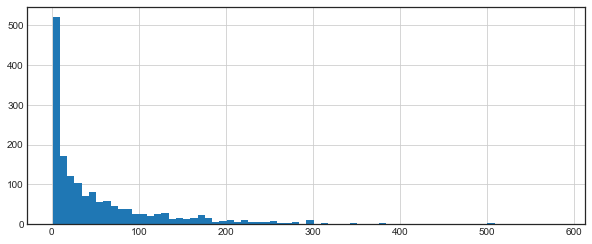

In [79]:
plt.figure(figsize=(10,4))
Rating['NR'].hist(bins=70)

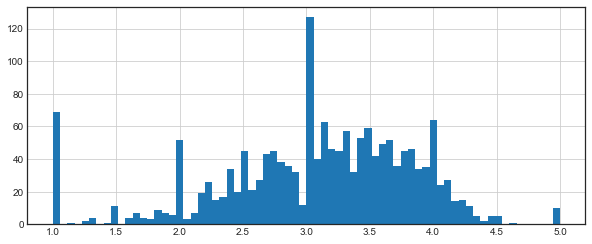

In [80]:
plt.figure(figsize=(10,4))
Rating['rating'].hist(bins=70)

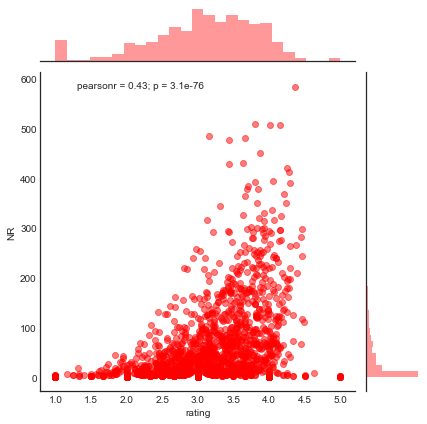

In [84]:
sns.jointplot(x='rating',y='NR',data=Rating,alpha=0.5,color='r')

In [86]:
moviemat= df.pivot_table(index='user_id',columns='title',values='rating')

In [87]:
moviemat.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
Rating.sort_values('NR',ascending=False).head(10)

,rating,NR
title,,
Star Wars (1977),4.359589,584
Contact (1997),3.803536,509
Fargo (1996),4.155512,508
Return of the Jedi (1983),4.007890,507
Liar Liar (1997),3.156701,485
"English Patient, The (1996)",3.656965,481
Scream (1996),3.441423,478
Toy Story (1995),3.878319,452
Air Force One (1997),3.631090,431


In [103]:
Starwars_user_rating = moviemat['Star Wars (1977)']
LiarLiar_user_rating = moviemat['Liar Liar (1997)']

In [104]:
Starwars_user_rating.head()

user_id
0    5.0
1    5.0
2    5.0
3    NaN
4    5.0
Name: Star Wars (1977), dtype: float64

In [106]:
similar_to_starwar= moviemat.corrwith(Starwars_user_rating)
similar_to_liarliar=moviemat.corrwith(LiarLiar_user_rating)

c:\users\arpit jain\appdata\local\programs\python\python36\lib\site-packages\numpy\lib\function_base.py:3159: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
c:\users\arpit jain\appdata\local\programs\python\python36\lib\site-packages\numpy\lib\function_base.py:3093: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


In [108]:
similar_to_starwar.head()

title
'Til There Was You (1997)    0.872872
1-900 (1994)                -0.645497
101 Dalmatians (1996)        0.211132
12 Angry Men (1957)          0.184289
187 (1997)                   0.027398
dtype: float64

In [110]:
corr_starwars= pd.DataFrame(similar_to_starwar,columns=['Correlation'])

In [112]:
corr_starwars.dropna(inplace=True)

In [113]:
corr_starwars.head()

,Correlation
title,
'Til There Was You (1997),0.872872
1-900 (1994),-0.645497
101 Dalmatians (1996),0.211132
12 Angry Men (1957),0.184289
187 (1997),0.027398


In [114]:
corr_starwars.sort_values('Correlation',ascending=False).head(10)

,Correlation
title,
Hollow Reed (1996),1.0
Commandments (1997),1.0
Cosi (1996),1.0
No Escape (1994),1.0
Stripes (1981),1.0
Star Wars (1977),1.0
Man of the Year (1995),1.0
"Beans of Egypt, Maine, The (1994)",1.0
"Old Lady Who Walked in the Sea, The (Vieille qui marchait dans la mer, La) (1991)",1.0


In [115]:
corr_starwars= corr_starwars.join(Rating['NR'])

In [121]:
corr_starwars.sort_values(by=['Correlation','NR'],ascending=[False,False]).head(10)

,Correlation,NR
title,,
Star Wars (1977),1.0,584
Man of the Year (1995),1.0,9
Hollow Reed (1996),1.0,6
No Escape (1994),1.0,5
Stripes (1981),1.0,5
Cosi (1996),1.0,4
Commandments (1997),1.0,3
Hurricane Streets (1998),1.0,9
Full Speed (1996),1.0,8


In [123]:
corr_starwars[corr_starwars['NR']>100].sort_values('Correlation',ascending=False).head()

,Correlation,NR
title,,
Star Wars (1977),1.000000,584
"Empire Strikes Back, The (1980)",0.748353,368
Return of the Jedi (1983),0.672556,507
Raiders of the Lost Ark (1981),0.536117,420
Austin Powers: International Man of Mystery (1997),0.377433,130


In [124]:
corr_liarliar= pd.DataFrame(similar_to_liarliar,columns=['Correlation'])

In [126]:
corr_liarliar.dropna(inplace=True)

In [ ]:
corr_liarliar= corr_liarliar.join(Rating['N'])